###### 단축키:  ESC + M ==> Mark Down 셀 실행됨 
###### 단축키:  ESC + Y      Python 셀 생성됨



## 와인 품질 분석/예측

### 기본 통계방법

### 와인데이터 수집

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

### 와인데이터 로드 

#### 기본 패키지 import 

In [ ]:
import pandas as pd 

### 준비된 와인 데이터 로드하기

In [ ]:
red_df = pd.read_csv('./data/winequality-red.csv')
white_df = pd.read_csv('./data/winequality-white.csv')

###### 읽은 데이터 확인

In [ ]:
red_df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [ ]:
# 구분자가 ; 로 되어있어서 값이 잘 안나옴. 따라서 구분자를 "; " 라고 pandas에  다시 알려줌
# csv 파일은 utf-8 로 인코딩하여 읽는 것이 기본이다. 좋다. 다만 공공데이터의경우 한글어가 많아서 cp949 로 인코딩해야한다. 

red_df = pd.read_csv('./data/winequality-red.csv', sep= ';', encoding='utf-8')
white_df = pd.read_csv('./data/winequality-white.csv', sep= ';', encoding='utf-8')

In [ ]:
red_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_df.head(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
# 데이터프레임의 형태 조회   (행, 열 )
red_df.shape

(1599, 12)

In [ ]:
white_df.shape 

(4898, 12)

In [ ]:
red_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


#### 와인별로 구분자 type(red, white) 추가

In [ ]:
red_df.insert(0, column= 'type', value= 'red')
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:

# 첫번째 열에 type 이란 컬럼을 생성하자
white_df.insert(0, column= 'type', value= 'white')
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 레드와인, 화이트와인 데이터를 결합 ---> wine_df
 ##### 결합하기 위해선 열의 수와 열 제목이 같아야 한다. 

In [ ]:

# 합치기 위해선 
wine_df = pd.concat([red_df, white_df])

In [ ]:
wine_df.shape

(6497, 13)

In [ ]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### wine_df를 csv로 저장

In [ ]:
wine_df.to_csv('./data/wine.csv', index = False , encoding = 'utf-8')

In [ ]:
wine = pd.read_csv('./data./wine.csv', encoding='utf-8')


In [ ]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
# nulll   : 널 : 수치가 들어가야는 데 값이 없기 때문에 null 값이 나타난다. 이 null 값이 껴있으면 계산이 안된다. 따라서 바꿔주어야한다 또는 제거해
# info 를 통해 null 값을 찾아 본다. 
##  NaN = Null 
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine.tail(n= 10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6487,white,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
6488,white,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6
6489,white,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
6490,white,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
6491,white,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
6492,white,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,white,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [ ]:
wine.columns = wine.columns.str.replace(' ', '_')
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 기본 통계값 나타내기  _ describe() 

In [ ]:
# 기본 통계 
wine.describe()

# 여기서 quality 는 통계적인 값이 아니라 ,,품질등급이므로 통계적인 것 아님.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# 전체와인 품질 등급 리스트
# 와인의 품질 등급은 총 7가지 로 나오더라
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [ ]:
# 와인 퀄리티 등급별 빈도수 개수 확인
wine.quality.value_counts

<bound method IndexOpsMixin.value_counts of 0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64>

##### 와인 그룹별로 확인 - groupby 이용** 


In [ ]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [ ]:
wine.groupby('type')['alcohol'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,10.422983,1.065668,8.4,9.5,10.2,11.1,14.9
white,4898.0,10.514267,1.230621,8.0,9.5,10.4,11.4,14.2


In [ ]:
# mean , std 함수를 묶어서 나타내기위해 agg 함수 사용
wine.groupby('type')['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


### t- 검정 / 회귀분석
 #### 라이브러리 import

In [ ]:


from scipy import stats  # t- 검정 (t-test)를 위한 라이브러리
# pip install statsmodels  회귀분석을 위한 statsmodel (cmd 콘솔에서 설치하기)


In [ ]:
# statsmodels 패키지 추가
!pip install statsmodels

You should consider upgrading via the 'C:\Users\admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



### 회귀 분석을 위한 statsmodels 패키지 import


In [ ]:
from statsmodels.formula.api import ols, glm


In [ ]:
# 그룹 분리하기 
 ## 레드 와인 샘플의 quality 값만 찾아서 red_wine_quality 에 저장한다.
red_wine_quality = wine.loc[wine.type == 'red','quality']
red_wine_quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
white_wine_quality = wine.loc[wine.type == 'white','quality']
white_wine_quality

1599    6
1600    6
1601    6
1602    6
1603    6
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 4898, dtype: int64

In [ ]:
#### t-검정 (t-test) 두 그룹 사이의 차이 
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var= False)


Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [ ]:
wine.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# 선형회귀분석 
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide +density + pH + sulphates +  alcohol' 

In [ ]:
# 모델 ols 

regre_result = ols(Rformula, data=wine).fit()
regre_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:11:40   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#모델 glm

regre_result = glm(Rformula, data=wine).fit()
regre_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 6497
Model:                            GLM   Df Residuals:                     6485
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.54071
Method:                          IRLS   Log-Likelihood:                -7215.5
Date:                Fri, 05 Aug 2022   Deviance:                       3506.5
Time:                        15:11:41   Pearson chi2:                 3.51e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3376
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.451      79.074
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.756     -31.178
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
========================================================================================
"""

# OLS 모델로 계산된 회귀분석 결과로 새 샘플 와인에 대한 품질등급 예측

In [ ]:
# difference - quality , type 은 제거하고 컬럼 알파벳 순으로 정렬된 독립 변수  : sample1 
sample1 = wine[wine.columns.difference(['quality','type'])]
sample1= sample1[0:5][:]
sample1   # 즉 ,  sample1 : red_wine 만 표현한것 임

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [ ]:
sample1_predict = regre_result.predict(sample1)
sample1_predict
# 예측값 


0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [ ]:
# 실제값 
wine[0:5]['quality']

## 즉, 결과 해석 : 예측값과 실제값이 동일하다! ! 이유 : 실제값가지고 예측을 했으니깐 그렇지요 


0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [ ]:
# 새로운 와인에서 추출된 데이터를 가지고 등급 예측
#alcohol	chlorides	citric_acid	density	fixed_acidity	free_sulfur_dioxide	pH	residual_sugar	sulphates	total_sulfur_dioxide	volatile_acidity

data = {'alcohol': [9.0, 0.88], 'chlorides': [0.055, 0.04], 'citric_acid': [0.3, 0.4], 'density': [0.996, 0.91], 'fixed_acidity':[8.5, 8.1], 'volatile_acidty': [0.8, 0.5], 'residual_sugar': [6.1, 5.8], 'total_sulfur_dioxide': [98.0, 99] , 'pH': [3.25, 3.01], 'free_sulfur_dioxide': [30.0, 31.0], 'sulphates': [0.4, 0.35], 'volatile_acidity': [0.8, 0.5]}

new_sample = pd.DataFrame(data, columns=sample1.columns)
new_sample

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [ ]:
new_sample_predict  = regre_result.predict(new_sample)

In [163]:
new_sample_predict

0    4.809094
1    7.582129
dtype: float64

#### 예측결과 의사결정
- 1번 -> 75,000 원
- 2번 -> 24,000 원


### 시각화

#### 와인유형에 따른 품질 등급 히스토그램

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


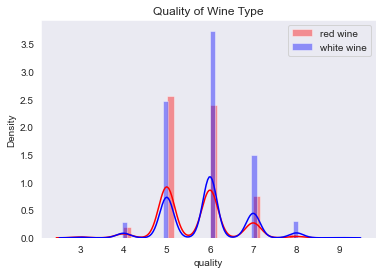

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns


# distribution plot 
sns.set_style('dark')
sns.distplot(red_wine_quality, kde = True, color= 'red', label = 'red wine') 
sns.distplot(white_wine_quality, kde = True, color= 'blue', label = 'white wine') 

plt.title('Quality of Wine Type')
plt.legend()
plt.show()


#### 선형회귀 분석값 시각화 

In [165]:
# 패키지 import 
import statsmodels.api as sm

others = list(set(wine.columns).difference(set(['quality', 'fixed_acidity'])))
others

['chlorides',
 'citric_acid',
 'alcohol',
 'density',
 'sulphates',
 'free_sulfur_dioxide',
 'pH',
 'total_sulfur_dioxide',
 'volatile_acidity',
 'residual_sugar',
 'type']

eval_env: 1


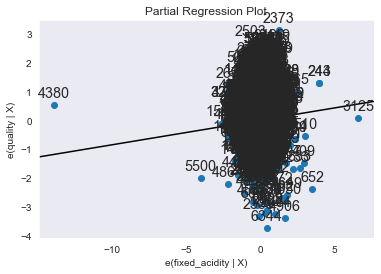

In [166]:
# fixed_acidity 에 따른 quality 영향 관계 그래프 
 ## 직선이 선형 regression 

sm.graphics.plot_partregress('quality', 'fixed_acidity', others, data=wine, ret_coords = True)
plt.show()

## 결과해석: 따라서, 그렇게 영향력이 없다. fixed_acidity와 quality 서로간의 관련이 별로 없더라. 

In [167]:
p, resides


(<Figure size 432x288 with 1 Axes>,
 (array([-0.0614815 , -0.02284876, -0.14904951, ..., -0.63960939,
         -0.27128396, -0.13872942]),
  array([ 0.02363191,  0.08667536, -0.04281161, ...,  0.55410286,
          0.5178791 , -0.2565605 ])))

In [169]:

# fig = plt.figure(figsize= (8, 13))
# p, resides = sm.graphics.plot_partregress_grid(fig=fig)
# plt.show()

TypeError: plot_partregress_grid() missing 1 required positional argument: 'results'

<Figure size 576x936 with 0 Axes>